<a href="https://colab.research.google.com/github/ZackAkil/optimising-basketball/blob/master/shot_prediction_app/basket_ball_tracking_shot_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Authenticate to GCS.
from google.colab import auth
auth.authenticate_user()

In [0]:
!gsutil cp gs://rugby-videos/VID_20181215_095232.mp4 .

Copying gs://rugby-videos/VID_20181215_095232.mp4...
| [1 files][639.5 MiB/639.5 MiB]                                                
Operation completed over 1 objects/639.5 MiB.                                    


In [0]:
!apt-get -qq install -qq ffmpeg -qq

In [0]:
!ffmpeg -ss 00:00:00.000 -i VID_20181215_095232.mp4 -t 00:0:30.000 -c copy out.mp4

In [0]:
!ffmpeg -i out.mp4 -vf scale=320:-1 output_320.mp4

In [0]:
!ls -l * 

-rw-r--r-- 1 root root      2561 Dec 24 17:37 adc.json
-rw-r--r-- 1 root root  45539538 Dec 24 17:38 out.mp4
-rw-r--r-- 1 root root    731897 Dec 24 17:38 output_320.mp4
-rw-r--r-- 1 root root 670583688 Dec 24 17:37 VID_20181215_095232.mp4

sample_data:
total 55504
-r-xr-xr-x 1 root root     1697 Jan  1  2000 anscombe.json
-rw-r--r-- 1 root root   301141 Dec 18 20:29 california_housing_test.csv
-rw-r--r-- 1 root root  1706430 Dec 18 20:29 california_housing_train.csv
-rw-r--r-- 1 root root 18289443 Dec 18 20:29 mnist_test.csv
-rw-r--r-- 1 root root 36523880 Dec 18 20:29 mnist_train_small.csv
-r-xr-xr-x 1 root root      903 Jan  1  2000 README.md


In [0]:
!pip install scikit-video --quiet

In [0]:
from skvideo.io import vread
import skvideo

In [0]:
data = vread('output_320.mp4')
data.shape

(901, 180, 320, 3)

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
def draw_trail(video_data):
  
#   video_data = video_data_in[:,:,:,1]
  
#   print(video_data.shape)
  
  frames, height, width = video_data.shape

  trail_frame = np.zeros([height, width])

  for i in range( len(video_data)-1 ):

    base_frame = video_data[i].astype(np.int32)
    next_frame = video_data[i+1].astype(np.int32)

    delta = abs(base_frame - next_frame)
    
    change_mask = delta > 20
    
    trail_frame[change_mask] += 100

  trail_frame = np.clip(trail_frame, 0, 255).astype(np.uint8)
#   plt.figure(dpi=150)
#   plt.grid(False)
#   plt.imshow(trail_frame)
  return trail_frame

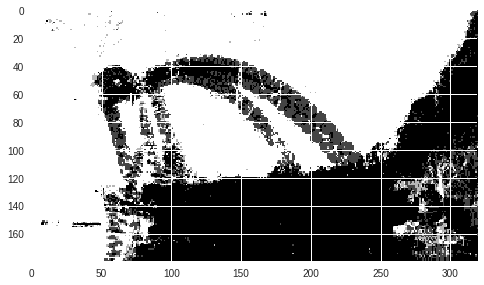

In [0]:
plt.imshow(draw_trail(data[:,:,:,0]))

In [0]:
data.shape

(901, 180, 320, 3)

In [0]:
900/30

30.0

In [0]:
window = 75
deltas = np.zeros([len(data)-window, data.shape[1], data.shape[2]])

for i in range(len(data)-window):
#   print(i, i+30)
  next_frame = draw_trail(data[i:i+window,:,:,0])
#   plt.imshow(next_frame)
  deltas[i] = next_frame

In [0]:
deltas.shape

(901, 180, 320)

In [0]:
skvideo.io.vwrite('test.mp4', deltas)

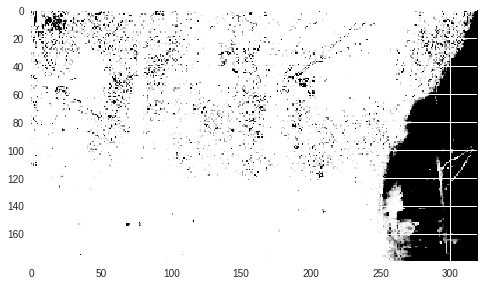

In [0]:
plt.imshow(deltas[10])
